In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src
! ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src
01-parse_data_bgl.py		hdfs.ipynb		   main.py	       vif_l1_tfidf.ipynb
bgl.ipynb			hdfsparser.py		   models	       xpl.ipynb
converter.ipynb			__init__.py		   __pycache__	       xpl.pkl
extensions			l1_comparison.ipynb	   splitdatabgl.ipynb
feature_importance.ipynb	l1_comparison_tfidf.ipynb  splitdatabgl.py
feature_importance_tfidf.ipynb	logrep			   vif_l1.ipynb


In [2]:
from models.traditional_withSVM import SVM
from models.traditional import DecisionTree
from models.traditional import LR
from extensions.stat_ranking import ModelData
from splitdatabgl import split_bgl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance
from sklearn import tree

In [3]:
data = np.load('../data/BGL/text-tfidf-template-BGL.log.structured2.npz')
train_x = data['x_train']
train_y = data['y_train']
test_x = data['x_test']
test_y = data['y_test']

In [4]:
vocabulary = pd.read_csv('../data/BGL/vocabulary.csv', header=None, names=['Feature', 'Index'])
display(vocabulary)

,Feature,Index
0,machine,711
1,check,206
2,interrupt,643
3,bit,149
4,prepareforservice,818
...,...,...
1061,interruptddr,646
1062,carddata,181
1063,interruptce,644
1064,interrupttotal,652


In [5]:
vocabulary_sorted = vocabulary.sort_values(by="Index")
display(vocabulary_sorted)

,Feature,Index
797,0ce,0
796,0ciod,1
755,0d,2
799,0generating,3
636,0l3,4
...,...,...
208,xer,1061
551,yciodb,1062
432,yidoproxydb,1063
767,ymmcs_db_server,1064


In [6]:
feature_names = vocabulary_sorted["Feature"]
display(feature_names)

797                0ce
796              0ciod
755                 0d
799        0generating
636                0l3
            ...       
208                xer
551             yciodb
432        yidoproxydb
767    ymmcs_db_server
723               zero
Name: Feature, Length: 1066, dtype: object

In [7]:
decision_tree = DecisionTree()
decision_tree.fit(train_x, train_y)

====== Model summary ======


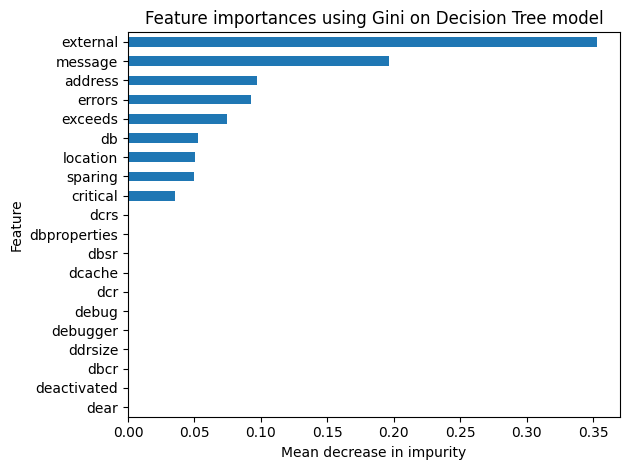

In [8]:
mdi_importances = pd.Series(
    decision_tree.classifier.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax1 = mdi_importances.tail(20).plot.barh()
ax1.set_title("Feature importances using Gini on Decision Tree model")
ax1.set_xlabel("Mean decrease in impurity")
ax1.figure.tight_layout()

In [9]:
print(mdi_importances.tail(20))

Feature
dear            0.000000
deactivated     0.000000
dbcr            0.000000
ddrsize         0.000000
debugger        0.000000
debug           0.000000
dcr             0.000000
dcache          0.000000
dbsr            0.000000
dbproperties    0.000000
dcrs            0.000000
critical        0.035031
sparing         0.049456
location        0.050045
db              0.052860
exceeds         0.074273
errors          0.092201
address         0.096857
message         0.196654
external        0.352624
dtype: float64


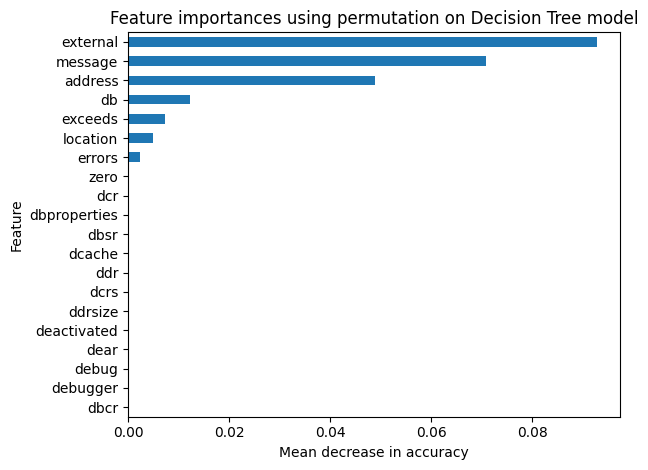

In [10]:
result = permutation_importance(
    decision_tree.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.barh()
ax2.set_title("Feature importances using permutation on Decision Tree model")
ax2.set_xlabel("Mean decrease in accuracy") # changed ylabel to xlabel
ax2.figure.tight_layout()

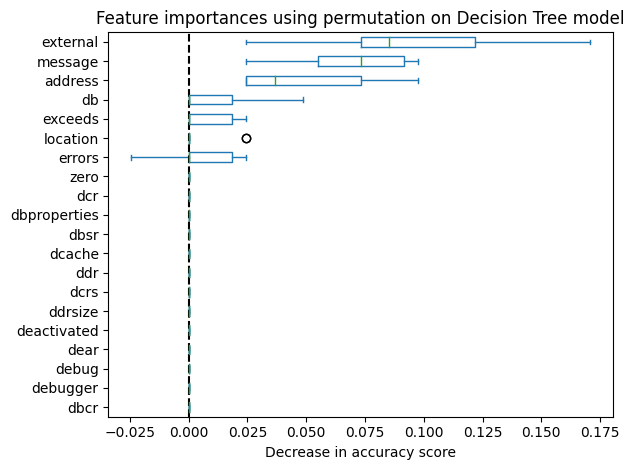

In [11]:
sorted_importances_idx = result.importances_mean.argsort()
importances_last_20 = sorted_importances_idx[-20:]
importances = pd.DataFrame(
    result.importances[importances_last_20].T,
    columns=permutation_importances.index,
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Feature importances using permutation on Decision Tree model")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

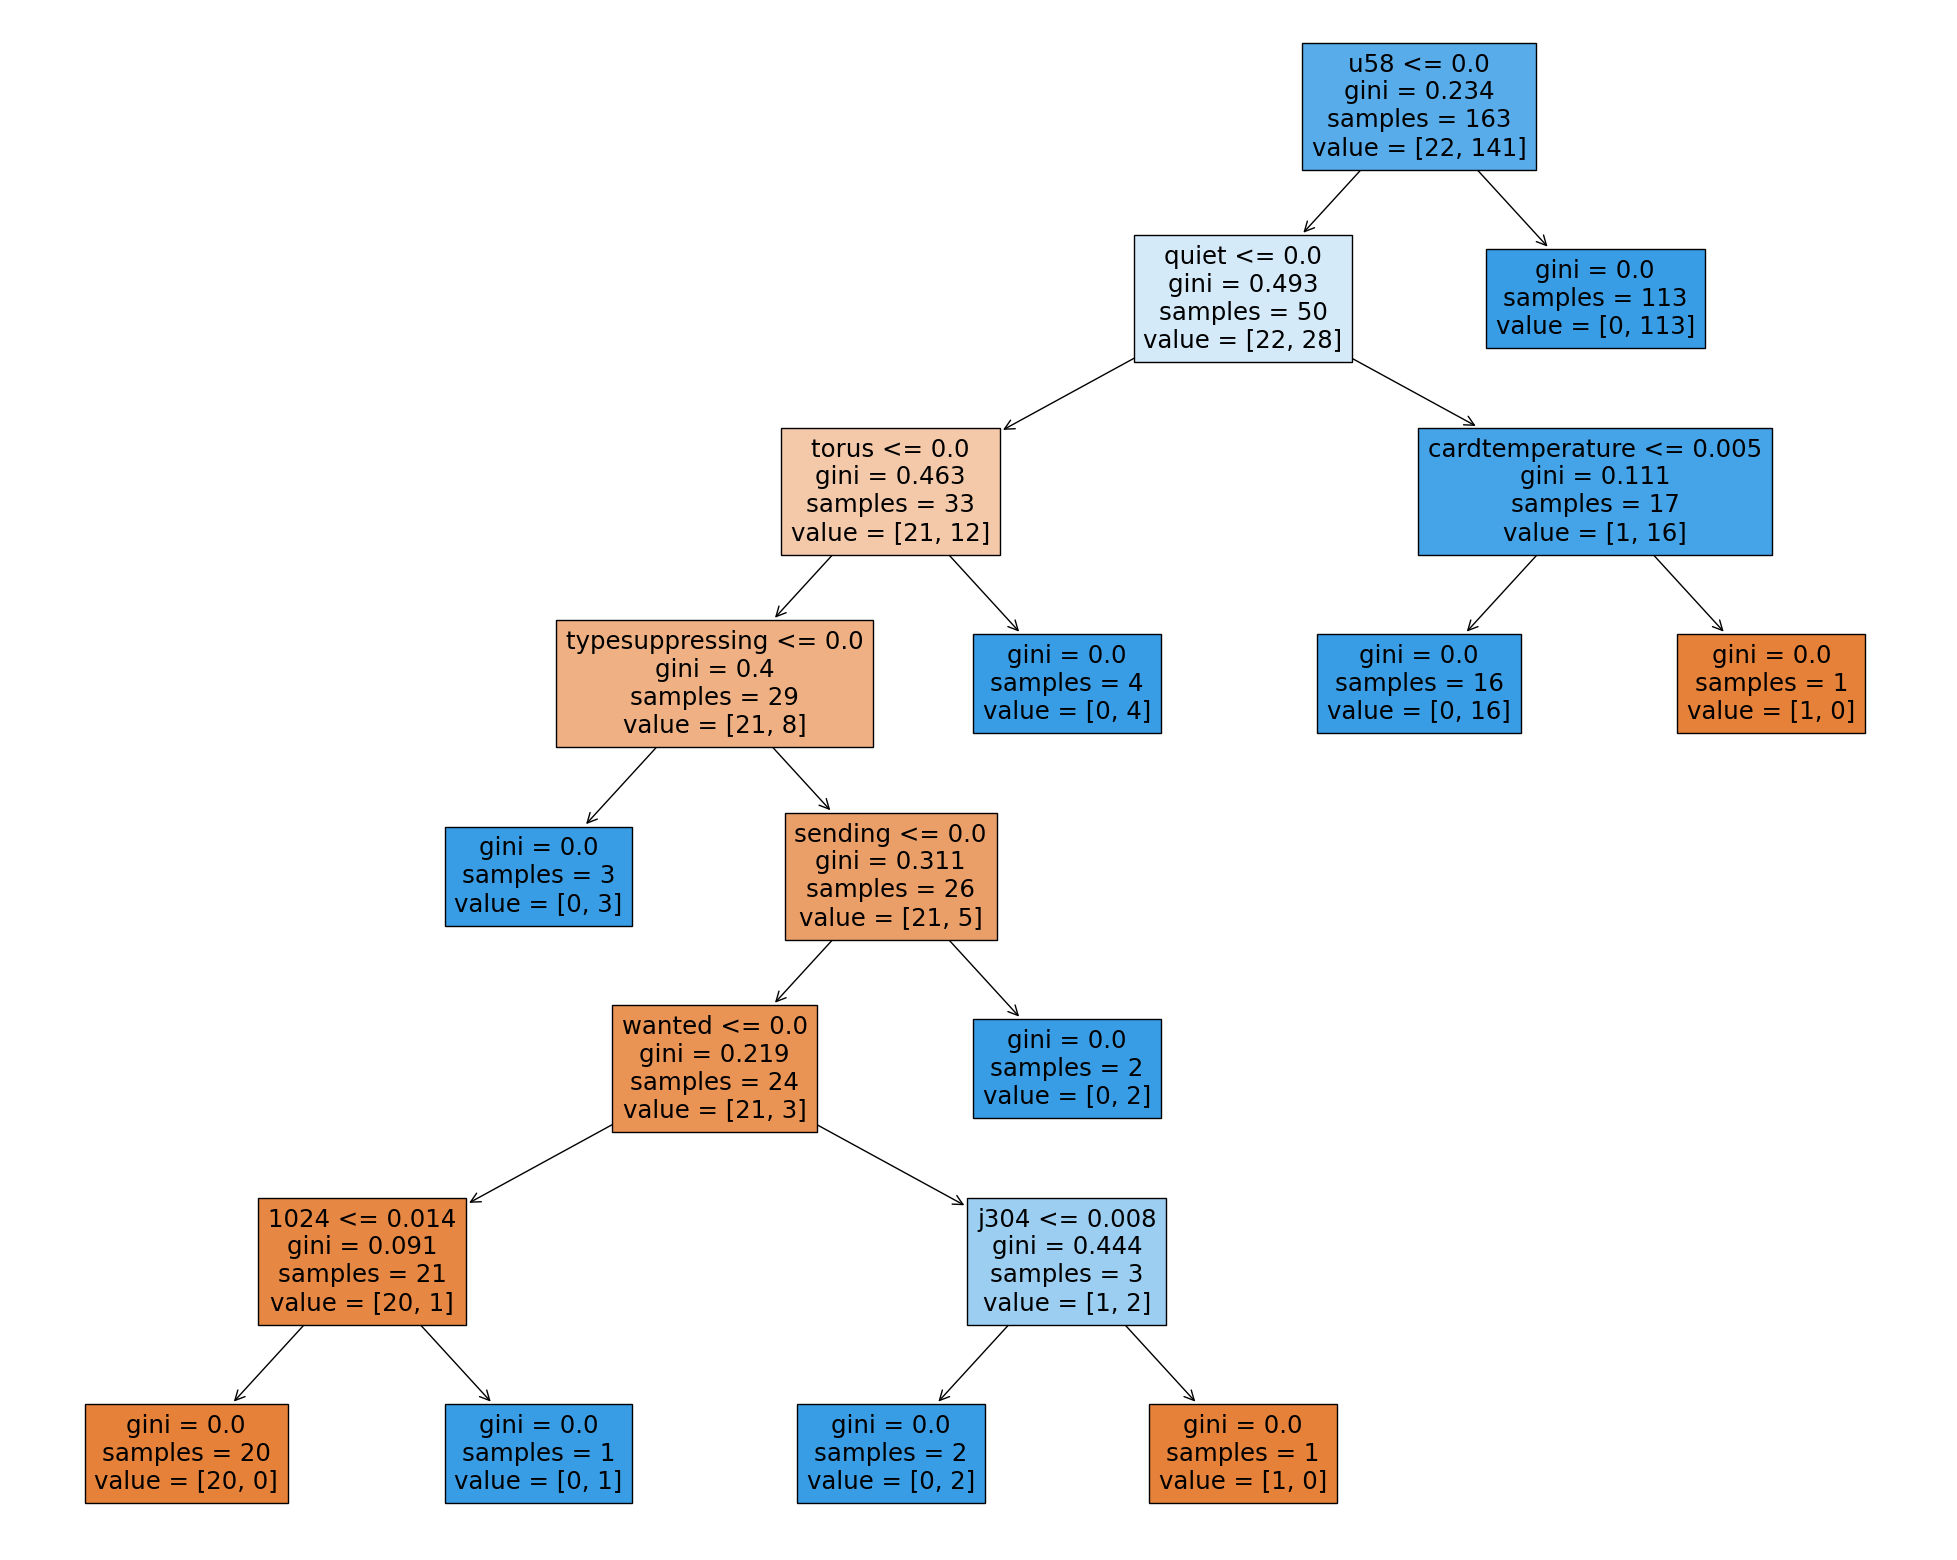

In [12]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree.classifier,
                   feature_names=feature_names,
                   filled=True)

In [13]:
lr = LR()
lr.fit(train_x, train_y)

====== Model summary ======


In [14]:
#mdi_importances = pd.Series(
#    lr.classifier.feature_importances_, index=feature_names
#).sort_values(ascending=True)

#ax1 = mdi_importances.tail(20).plot.barh()
#ax1.set_title("Feature importances using Gini on LR model")
#ax1.set_xlabel("Mean decrease in importance") # changed ylabel to xlabel
#ax1.figure.tight_layout()

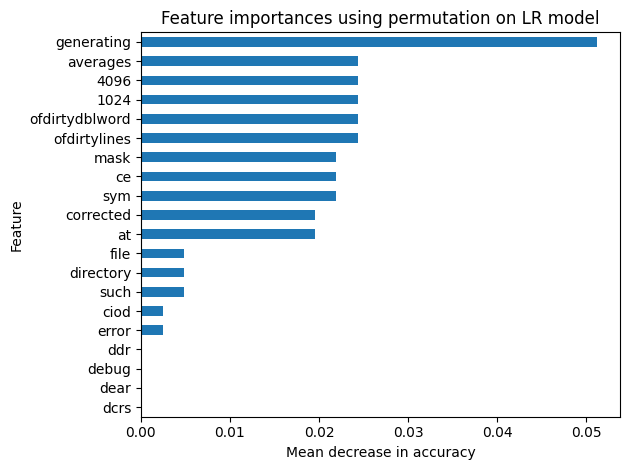

In [15]:
result = permutation_importance(
    lr.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.barh()
ax2.set_title("Feature importances using permutation on LR model")
ax2.set_xlabel("Mean decrease in accuracy") # changed ylabel to xlabel
ax2.figure.tight_layout()

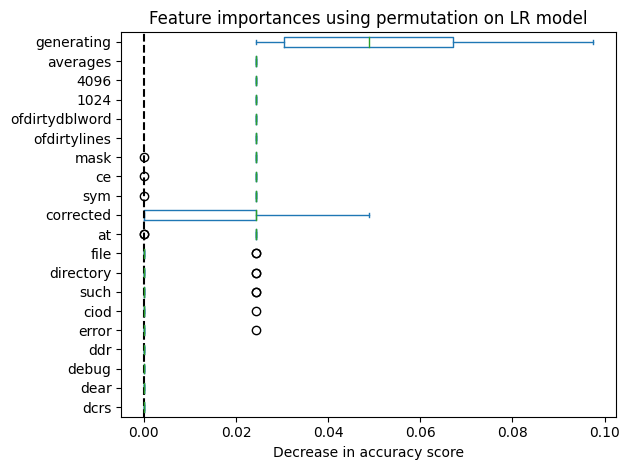

In [16]:
sorted_importances_idx = result.importances_mean.argsort()
importances_last_20 = sorted_importances_idx[-20:]
importances = pd.DataFrame(
    result.importances[importances_last_20].T,
    columns=permutation_importances.index,
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Feature importances using permutation on LR model")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [17]:
svm = SVM()
svm.fit(train_x, train_y)

====== Model summary ======


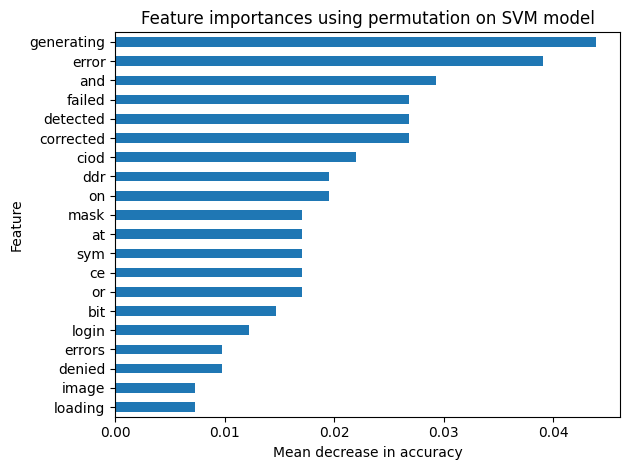

In [18]:
result = permutation_importance(
    svm.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.barh()
ax2.set_title("Feature importances using permutation on SVM model")
ax2.set_xlabel("Mean decrease in accuracy") # changed ylabel to xlabel
ax2.figure.tight_layout()

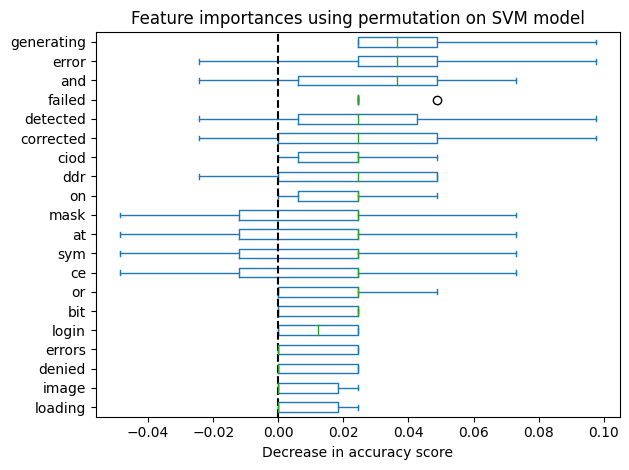

In [19]:
sorted_importances_idx = result.importances_mean.argsort()
importances_last_20 = sorted_importances_idx[-20:]
importances = pd.DataFrame(
    result.importances[importances_last_20].T,
    columns=permutation_importances.index,
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Feature importances using permutation on SVM model")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [20]:
! pip install shapash

In [21]:
import shapash
from shapash import SmartExplainer

In [22]:
df_test_x = pd.DataFrame(test_x, columns=feature_names)
df_test_y = pd.DataFrame(test_y, columns=['isAnomaly'])

df_test_x.columns = df_test_x.columns.astype(str)

In [23]:
decision_tree.fit(train_x, train_y)

#decision_tree.fit(df_test_x, df_test_y)

====== Model summary ======


In [24]:
xpl = SmartExplainer(
  model=decision_tree.classifier,
  features_dict=feature_names.to_dict()
)

xpl.compile(
    x=df_test_x,
    y_target=df_test_y, # Optional: allows to display True Values vs Predicted Values
)

In [25]:
#app = xpl.run_app(title_story='Log Anomaly', port=8020)

In [26]:
xpl.plot.features_importance(max_features=10)

In [27]:
xpl.plot.compare_plot(index=list(range(20, 41)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [28]:
xpl.filter(max_contrib=10)
xpl.plot.local_plot(index=df_test_x.index[1])

In [29]:
xpl.plot.contribution_plot(col='kernel')

In [30]:
xpl.plot.interactions_plot('external', 'message')

In [31]:
xpl.plot.scatter_plot_prediction()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [32]:
xpl.plot.scatter_plot_prediction()

In [33]:
xpl.save('../data/xpl.pkl')